## 분석 상황
- E-commerce 데이터를 활용하여 비즈니스 지표를 정의하고 분석 결과를 도출해 본다.
- AARRR을 포함한 비즈니스 지표는 정답이 없으며 회사의 상황과 의사결정자의 판단에 따라 적절한 지표를 선택해주는 것이 중요하다.

## 데이터 설명
- 데이터 출처: https://archive.ics.uci.edu/dataset/502/online+retail+ii
  
## 컬럼 설명
- `InvoiceNo`: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code - starts with the letter 'c', it indicates a cancellation.
- `StockCode`: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- `Description`: Product (item) name. Nominal.
- `Quantity`: The quantities of each product (item) per transaction. Numeric.
- `InvoiceDate`: Invice date and time. Numeric. The day and time when a transaction was generated.
- `UnitPrice`: Unit price. Numeric. Product price per unit in sterling (Â£).
- `CustomerID`: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- `Country`: Country name. Nominal. The name of the country where a customer resides.

In [3]:
#데이터 처리
import pandas as pd
import numpy as np

#시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 통계툴
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

from scipy import stats
from scipy.stats import shapiro

In [4]:
df1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
df2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [5]:
df = pd.concat([df1, df2], ignore_index=True) # 인덱스 새로 부여

In [6]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


#### InvoiceDate 컬럼을 날짜 형식으로 변환, Customer ID 결측치 제거

In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [8]:
df = df.dropna(subset=['Customer ID'])

In [9]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


#### Customer ID를 정수형으로 변환한 후, InvoiceDate를 기준으로 데이터를 정렬

In [10]:
df['Customer ID'] = df['Customer ID'].astype(int)

C:\Users\juwonhee\AppData\Local\Temp\ipykernel_17684\2318257336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer ID'] = df['Customer ID'].astype(int)


In [11]:
df = df.sort_values(by='InvoiceDate')

In [12]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France


In [13]:
df['Total'] = round(df['Quantity'] * df['Price'],1)

In [14]:
# Total = Quantity * Price 
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0
...,...,...,...,...,...,...,...,...,...
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.8
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.8
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.8
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,15.0


## 나라별 구매 인원 시각화
### Country 컬럼을 기준으로 Customer ID의 유니크한 값을 계산하여 나라별 구매 고객 수를 시각화 해 본다.

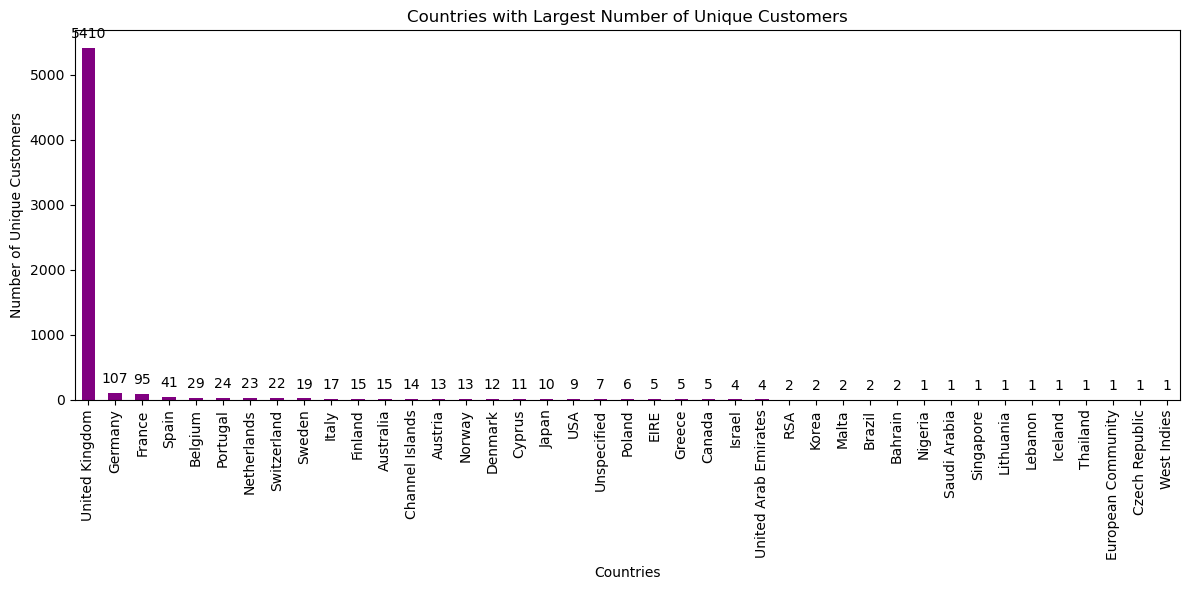

In [15]:
country_customer_count = df.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = country_customer_count.plot(kind='bar', color='purple')

plt.bar_label(ax.containers[0], fontsize=10, color='black', padding=5)
plt.title('Countries with Largest Number of Unique Customers')
plt.xlabel('Countries')
plt.ylabel('Number of Unique Customers')

plt.tight_layout()
plt.show()

## AARRR
### Acquisition(고객 유입 분석)
- 신규 고객 분석을 위해 고객의 첫 구매 시점을 기준으로 월별 신규 유입 고객 수를 계산한다.
- 각 고객의 첫 구매 날짜를 추출하고, 월별 신규 고객 수를 시각화한다.

In [16]:
# 고객별 첫 구매 시점을 기준으로 월별 신규 유입 고객 수
first_purchase_date = df.groupby('Customer ID')['InvoiceDate'].min()

In [17]:
first_purchase_date = first_purchase_date.dt.to_period('M') # yyyy-mm 형태로 추출

In [18]:
first_purchase_date

Customer ID
12346    2009-12
12347    2010-10
12348    2010-09
12349    2009-12
12350    2011-02
          ...   
18283    2010-02
18284    2010-10
18285    2010-02
18286    2009-12
18287    2009-12
Name: InvoiceDate, Length: 5942, dtype: period[M]

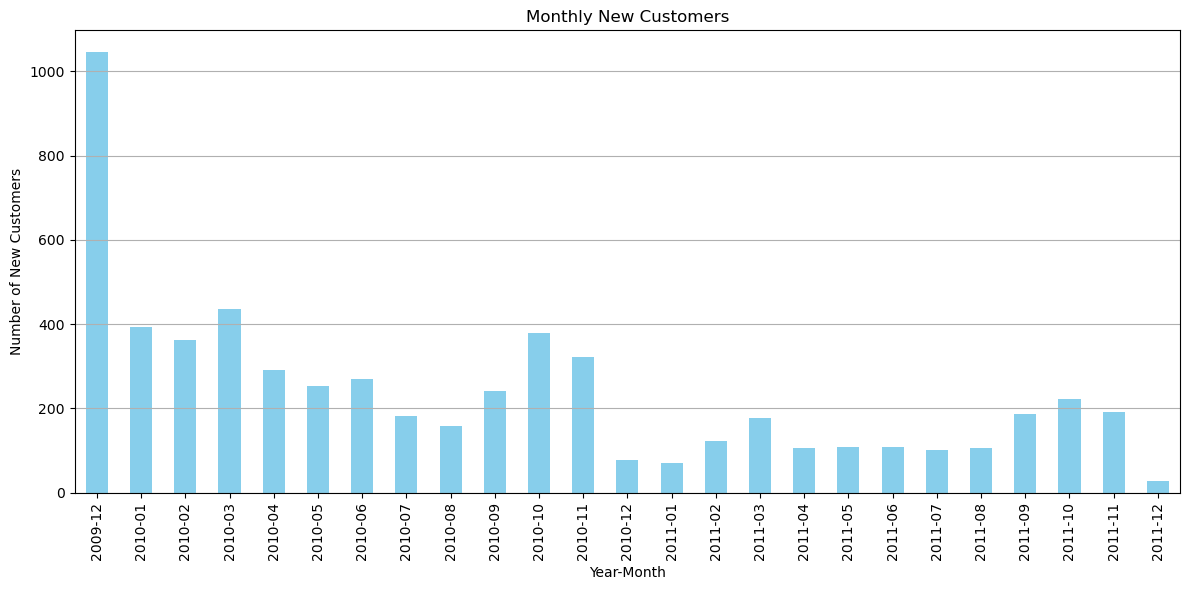

In [19]:
new_customers_per_month = first_purchase_date.value_counts().sort_index()
plt.figure(figsize=(12, 6))
new_customers_per_month.plot(kind='bar', color='skyblue')
plt.title('Monthly New Customers')
plt.xlabel('Year-Month')
plt.ylabel('Number of New Customers')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [20]:
df['new_customers_per_month'] = first_purchase_date.value_counts().sort_index()
df.drop(columns=['new_customers_per_month'], inplace=True)

In [21]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0
...,...,...,...,...,...,...,...,...,...
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.8
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.8
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.8
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,15.0


### Activation (고객 활성화 분석)
#### 모든 고객 중 첫 구매 이후 총 구매 금액이 특정 기준 금액 (£50) 이상인 고객 = 활성화된 고객
#### 전체 고객 수와 활성화된 고객 수를 비교하여 활성화율 도출

In [22]:
total_customer = df.groupby('Customer ID').nunique() # 5942

In [23]:
first_purchase_date = df.groupby('Customer ID')['InvoiceDate'].min() # 유저별 최초 구매일

# 유저별 최초 구매일 이후 데이터 추출
after_purchase_date = df[df['InvoiceDate'] >= df['Customer ID'].map(first_purchase_date)]

# 유저별 최초 구매일 이후 데이터에서 Quantity * Price = Total 
after_purchase_date['Total'] = after_purchase_date['Quantity'] * after_purchase_date['Price']

# 유저별 최초 구매일 이후 데이터에서 총 구매 금액 합
total_after_first_purchase = after_purchase_date.groupby('Customer ID')['Total'].sum()

# (£50) 이상인 고객
actived_customers = total_after_first_purchase[total_after_first_purchase >= 50]

total_customers = df['Customer ID'].nunique() # 전체 고객 수 
actived_customers_count = actived_customers.count() # 활성화된 고객 수

activation_rate = (actived_customers_count / total_customers) * 100 # 고객 활성화율

print(f"총 고객 수: {total_customers}")
print(f"활성화된 고객 수 (첫 구매 후 £50 이상 지출한 고객): {actived_customers_count}")
print(f"고객 활성화율: {activation_rate:.2f}%")


총 고객 수: 5942
활성화된 고객 수 (첫 구매 후 £50 이상 지출한 고객): 5777
고객 활성화율: 97.22%


## Retention:코호트 분석(고객)
### 분기별 활성 사용자(MAU)를 분석하여 고객 유지 현황을 파악

In [24]:
first_purchase = df.groupby('Customer ID')['InvoiceDate'].min()
df['first_purchase_date'] = df['Customer ID'].map(first_purchase)
df['first_purchase_quarter'] = df['first_purchase_date'].dt.to_period('Q')
df['purchase_quarter'] = df['InvoiceDate'].dt.to_period('Q')

df = df[df['first_purchase_quarter'].dt.year > 2009]
# df.loc[df['first_purchase_quarter'].dt.year == 2009, 'first_purchase_quarter'] = '2010Q1'

# [0,1,2,3,4,5,6,7]
df['CohortIndex'] = (df['purchase_quarter'].dt.year - df['first_purchase_quarter'].dt.year) * 4 + (df['purchase_quarter'].dt.quarter - df['first_purchase_quarter'].dt.quarter)

after_purchase = df[df['InvoiceDate'] >= df['Customer ID'].map(first_purchase)]
after_purchase['Total'] = after_purchase['Quantity'] * after_purchase['Price']
total_after_first = after_purchase.groupby('Customer ID')['Total'].sum()
active_customers = total_after_first[total_after_first >= 50].index

C:\Users\juwonhee\AppData\Local\Temp\ipykernel_17684\234978335.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortIndex'] = (df['purchase_quarter'].dt.year - df['first_purchase_quarter'].dt.year) * 4 + (df['purchase_quarter'].dt.quarter - df['first_purchase_quarter'].dt.quarter)


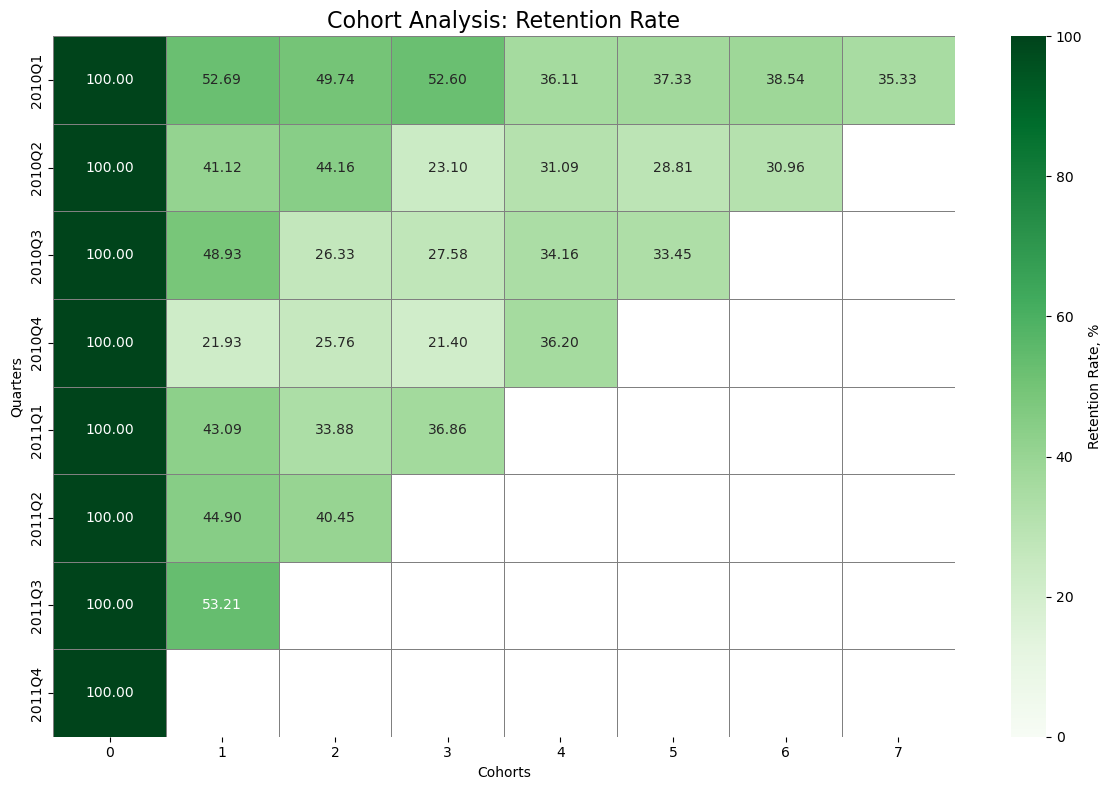

In [25]:
cohort_data = df[df['Customer ID'].isin(active_customers)] # 활성화된 고객에 대해서 데이터 생성

cohort_pivot = cohort_data.pivot_table(
    index='first_purchase_quarter',
    columns='CohortIndex',
    values='Customer ID',
    aggfunc='nunique'
)
# cohort_pivot

retention = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0) * 100

plt.figure(figsize=(12,8))
sns.heatmap(
    data=retention,
    annot=True,                # 셀 내부에 값 표시
    fmt='.2f',                 # 텍스트 형식 (소수점 2자리)
    cmap='Greens',             # 색상 팔레트
    cbar_kws={'label': 'Retention Rate, %'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0, vmax=100           # Retention Rate의 범위 설정
)
plt.title('Cohort Analysis: Retention Rate', fontsize=16)
plt.xlabel('Cohorts')
plt.ylabel('Quarters')
plt.tight_layout()
plt.show()

## Retention: 코호트 분석(평균 구매수량)
- 분기단위의 활성 사용자의 평균 구매수량을 분석
- 구매수량이기 때문에 0 index의 값이 100% 가 아닌 절대 값임을 주의

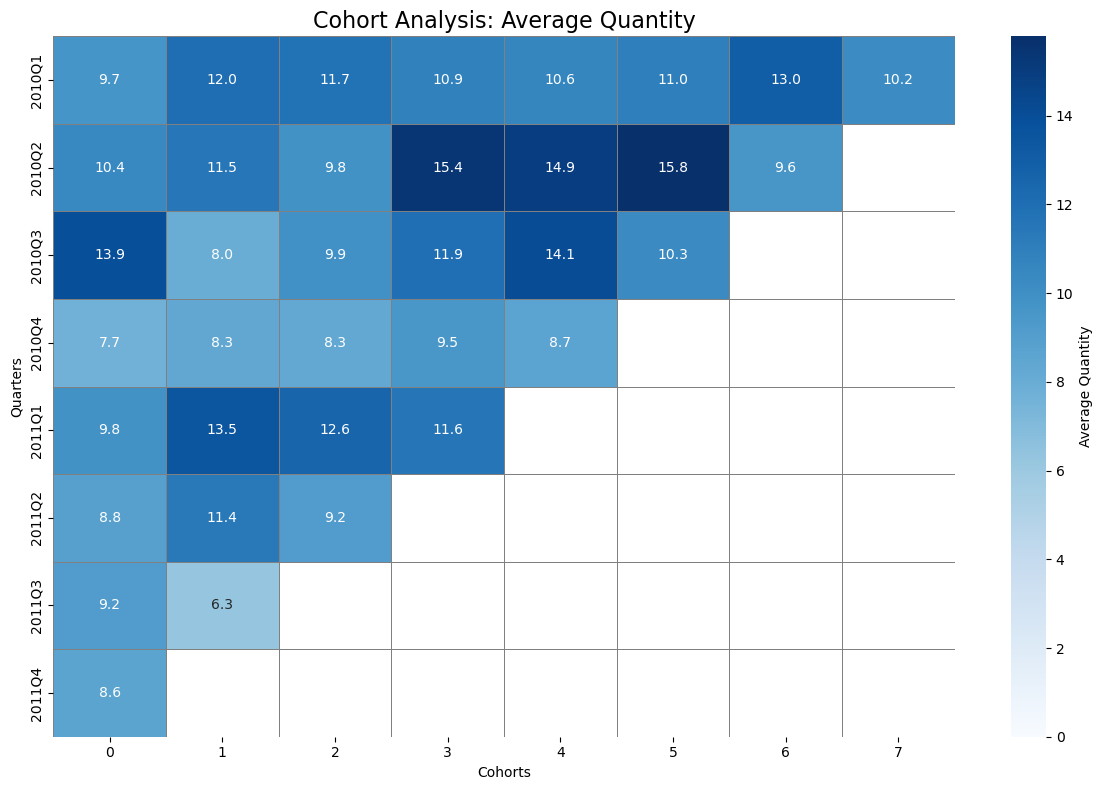

In [26]:
first_purchase = df.groupby('Customer ID')['InvoiceDate'].min()
after_purchase = df[df['InvoiceDate'] >= df['Customer ID'].map(first_purchase)]
after_purchase['Total'] = after_purchase['Quantity'] * after_purchase['Price']
total_after_first = after_purchase.groupby('Customer ID')['Total'].sum()
active_customers = total_after_first[total_after_first >= 50].index
cohort_data_active = df[df['Customer ID'].isin(active_customers)]

average_quantity = cohort_data_active.pivot_table(
    index='first_purchase_quarter',
    columns='CohortIndex',
    values='Quantity',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    data=average_quantity,
    annot=True,                # 셀 내부에 값 표시
    fmt='.1f',                 # 텍스트 형식 (소수점 1자리)
    cmap='Blues',              # 색상 팔레트
    cbar_kws={'label': 'Average Quantity'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0                     # 최소값 설정 (필요 시 조정 가능)
)
plt.title('Cohort Analysis: Average Quantity', fontsize=16)
plt.xlabel('Cohorts')
plt.ylabel('Quarters')
plt.tight_layout()
plt.show()

In [27]:
cohort_data.count() # 전체 활성 사용자 수 

Invoice                   478185
StockCode                 478185
Description               478185
Quantity                  478185
InvoiceDate               478185
Price                     478185
Customer ID               478185
Country                   478185
Total                     478185
first_purchase_date       478185
first_purchase_quarter    478185
purchase_quarter          478185
CohortIndex               478185
dtype: int64

## Revenue : ARPU
### 고객별 월별 구매액을 집계하고, 이를 기반으로 ARPU 분석

In [28]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

C:\Users\juwonhee\AppData\Local\Temp\ipykernel_17684\2323077718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')


In [29]:
customer_monthly_revenue = df.groupby(['Customer ID', 'InvoiceMonth'])['Total'].sum()

In [30]:
customer_monthly_revenue

Customer ID  InvoiceMonth
12347        2010-10          611.5
             2010-12         1423.4
             2011-01          475.3
             2011-04          636.2
             2011-06          382.6
                              ...  
18283        2011-10          114.4
             2011-11          650.5
             2011-12          207.4
18284        2010-10          436.7
18285        2010-02          427.0
Name: Total, Length: 17407, dtype: float64

In [31]:
arpu = customer_monthly_revenue.groupby('InvoiceMonth').mean()

In [32]:
# customer_monthly_revenue/ monthly_active_users
arpu

InvoiceMonth
2010-01    382.880457
2010-02    435.202004
2010-03    375.188253
2010-04    435.181293
2010-05    410.970489
2010-06    383.404803
2010-07    401.544625
2010-08    412.726601
2010-09    504.034198
2010-10    462.570133
2010-11    482.430043
2010-12    560.902317
2011-01    513.958577
2011-02    411.698117
2011-03    461.069615
2011-04    418.838019
2011-05    480.882438
2011-06    426.741578
2011-07    455.093768
2011-08    497.990652
2011-09    561.776289
2011-10    518.351175
2011-11    523.406620
2011-12    379.832051
Freq: M, Name: Total, dtype: float64

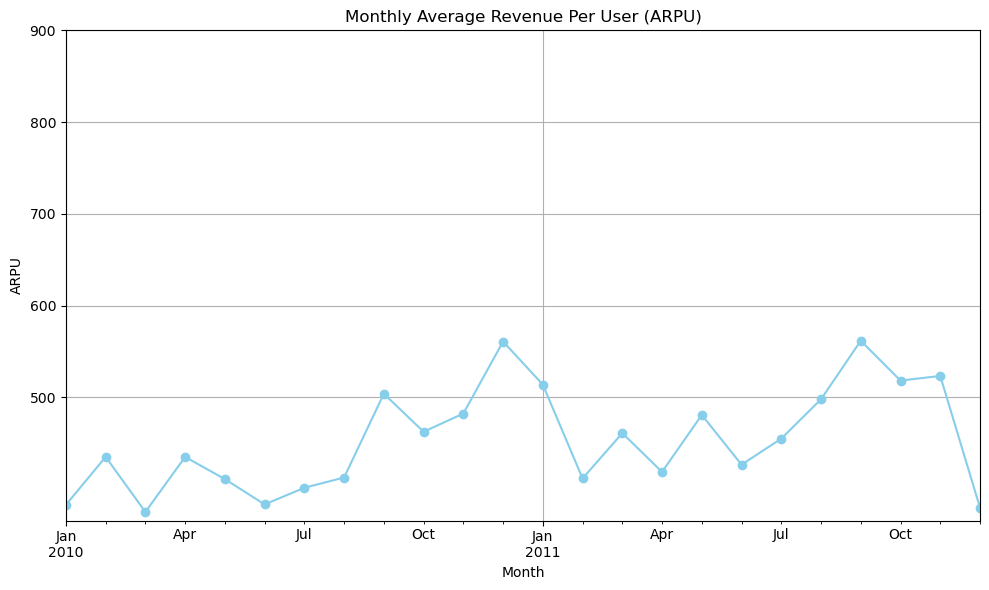

In [33]:
# ARPU 시각화 (선 그래프)
plt.figure(figsize=(10, 6))
arpu.plot(kind='line', marker='o', color='skyblue')
plt.title('Monthly Average Revenue Per User (ARPU)')
plt.xlabel('Month')
plt.ylabel('ARPU')
plt.grid(True)
plt.yticks(range(500, 901, 100))
plt.tight_layout()
plt.show()

## Revenue(CLV)
- CLV 계산
- 평균 금액 * 평균 구매 빈도 * 고객유지기간

In [34]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,first_purchase_date,first_purchase_quarter,purchase_quarter,CohortIndex,InvoiceMonth
45259,493427,21777,RECIPE BOX WITH METAL HEART,2,2010-01-04 10:43:00,7.95,13287,United Kingdom,15.9,2010-01-04 10:43:00,2010Q1,2010Q1,0,2010-01
45258,493427,84686,BEACH HUT MIRROR,2,2010-01-04 10:43:00,4.25,13287,United Kingdom,8.5,2010-01-04 10:43:00,2010Q1,2010Q1,0,2010-01
45257,493427,84615,PINK ROUND BUTTERFLY MIRROR,2,2010-01-04 10:43:00,7.95,13287,United Kingdom,15.9,2010-01-04 10:43:00,2010Q1,2010Q1,0,2010-01
45256,493427,22178,VICTORIAN GLASS HANGING T-LIGHT,12,2010-01-04 10:43:00,1.25,13287,United Kingdom,15.0,2010-01-04 10:43:00,2010Q1,2010Q1,0,2010-01
45255,493427,21428,SET3 BOOK BOX GREEN GINGHAM FLOWER,4,2010-01-04 10:43:00,4.25,13287,United Kingdom,17.0,2010-01-04 10:43:00,2010Q1,2010Q1,0,2010-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.8,2011-08-18 15:44:00,2011Q3,2011Q4,1,2011-12
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.8,2011-08-18 15:44:00,2011Q3,2011Q4,1,2011-12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.8,2011-08-18 15:44:00,2011Q3,2011Q4,1,2011-12
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,15.0,2011-08-18 15:44:00,2011Q3,2011Q4,1,2011-12


In [40]:
# 예시 데이터 한 번에 만들기
CLV_data = df.groupby('Customer ID').agg({
    'Total': 'sum',                      
    'InvoiceDate': ['min', 'max'],       
    'Invoice': 'nunique'                
}).reset_index()

CLV_data.columns = ['Customer ID', 'Total Revenue', 'FirstPurchaseDate', 'LastPurchaseDate', 'Frequency']

CLV_data['Customer Lifespan (days)'] = (
    CLV_data['LastPurchaseDate'] - CLV_data['FirstPurchaseDate']
).dt.days + 1

CLV_data['AverageAmount'] = CLV_data['Total Revenue'] / CLV_data['Frequency']

CLV_data['AvgFrequency'] = CLV_data['Frequency'] / CLV_data['Customer Lifespan (days)']

# CLV = 평균금액 × 평균구매빈도 * 고객유지기간
CLV_data['CLV'] = (
    CLV_data['AverageAmount'] *
    CLV_data['AvgFrequency'] *
    CLV_data['Customer Lifespan (days)']
)

CLV_result = CLV_data[[
    'Customer ID', 'CLV', 'Total Revenue', 'Frequency', 'Customer Lifespan (days)'
]].copy()

CLV_result = CLV_result.sort_values(by='CLV', ascending=False)
CLV_result

,Customer ID,CLV,Total Revenue,Frequency,Customer Lifespan (days)
4207,17450,233578.5,233578.5,61,430
64,12415,143267.9,143267.9,33,504
1460,14088,62399.3,62399.3,20,411
1466,14096,57140.1,57140.1,34,98
3642,16754,56560.4,56560.4,35,270
...,...,...,...,...,...
3832,16981,-4620.9,-4620.9,1,1
2831,15760,-5795.9,-5795.9,5,1
2903,15849,-5876.3,-5876.3,1,1
507,12918,-10953.5,-10953.5,3,1


In [42]:
CLV_result.head(3)

,Customer ID,CLV,Total Revenue,Frequency,Customer Lifespan (days)
4207,17450,233578.5,233578.5,61,430
64,12415,143267.9,143267.9,33,504
1460,14088,62399.3,62399.3,20,411


In [43]:
CLV_result.tail(3)

,Customer ID,CLV,Total Revenue,Frequency,Customer Lifespan (days)
2903,15849,-5876.3,-5876.3,1,1
507,12918,-10953.5,-10953.5,3,1
4170,17399,-25111.1,-25111.1,1,1


In [46]:
wait_1 = 5
wait_2 = 15
n = 100

waiting_time = np.random.uniform(wait_1, wait_2, n)
mean_waiting_time = np.mean(waiting_time)
std_waiting_time = np.std(waiting_time)

print(f"평균 대기시간: {mean_waiting_time:.2f}")
print(f"표준편차: {std_waiting_time:.2f}")

평균 대기시간: 10.19
표준편차: 2.92


In [47]:
n = 10
p = 0.3

outcomes = np.random.binomial(1, p, n) # 성공 == 1
success_count = np.sum(outcomes) # 성공 횟수를 계산

print(f"각 시도 결과: {outcomes}")
print(f"성공 횟수: {success_count}")

각 시도 결과: [0 0 0 1 0 0 0 1 1 1]
성공 횟수: 4


In [48]:
student = 20
n = 5
p = 0.7

scores = []
for _ in range(student):
    answers = np.random.binomial(n,p)
    scores.append(answers)

average_scores = np.mean(scores)

print(f"학생별 점수: {scores}")
print(f"평균 점수: {average_scores:.2f}")


학생별 점수: [3, 5, 3, 5, 5, 4, 3, 2, 3, 4, 4, 3, 4, 4, 2, 3, 5, 4, 3, 4]
평균 점수: 3.65


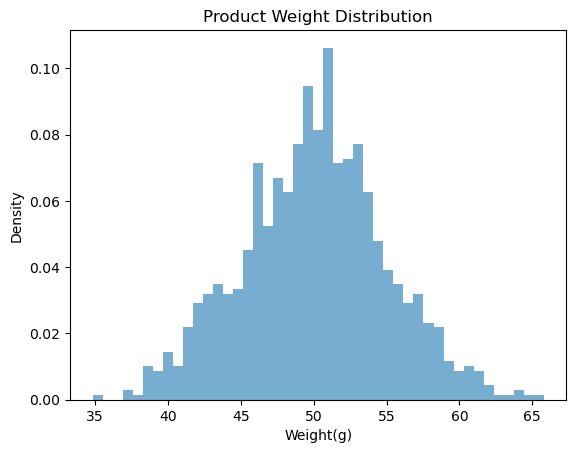

In [49]:
_mean = 50
_std = 5
n = 1000

weights = np.random.normal(_mean, _std, n)
within_range = np.sum((weights >= 45) & (weights <= 55)) / n * 100

# 무게 분포의 히스토그램 그리기
plt.hist(weights,bins=45,density=True, alpha=0.6)
plt.title('Product Weight Distribution')
plt.xlabel('Weight(g)')
plt.ylabel('Density')
plt.show()

### 회고
이번 프로젝트를 통해 사용자 행동 데이터를 분석하는 능력을 길렀다.  
특히 AARRR 프레임워크를 기반으로 각 단계에 맞는 핵심 지표를 설정하고, 이를 시각적으로 표현하면서 전체 흐름을 체계적으로 파악할 수 있었다.  
수집된 데이터를 토대로 지표 간의 연관성을 분석하고, 이를 통해 사용자 행동의 전반적인 패턴을 유추해내는 과정을 통해    
데이터를 단순히 수치로 보는 것을 넘어, 그 이면의 흐름과 맥락을 해석하려는 시도가 스스로에게 큰 성장의 계기가 되었다.